In [2]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 43.7 MB/s eta 0:00:00


In [5]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  libprotobuf-lite23 liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils
  mysql-client-8.0 mysql-client-core-8.0 mysql-server-8.0
  mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl
  mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  lib

In [6]:
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [7]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

In [13]:
import mysql.connector

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')

# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

#print(cursor)
cursor.execute("CREATE DATABASE mydatabase")

DatabaseError: 1007 (HY000): Can't create database 'mydatabase'; database exists

In [14]:
# Create a new database named 'library'
cursor.execute("CREATE DATABASE IF NOT EXISTS library")

# Switch to the 'library' database
cursor.execute("USE library")

# Create the 'books' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS books (
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    author VARCHAR(255) NOT NULL,
    year_published INT
)
''')

# Always remember to close the cursor and connection when done
cursor.close()
conn.close()

In [15]:
import mysql.connector

# Connect to the MySQL server and the 'library' database
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')
cursor = conn.cursor()

books_data = [
    ("To Kill a Mockingbird", "Harper Lee", 1960),
    ("1984", "George Orwell", 1949),
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925)
]

# Insert data using the cursor
cursor.executemany('''
INSERT INTO books (title, author, year_published) VALUES (%s, %s, %s)
''', books_data)

# Commit the changes
conn.commit()

# Close the cursor and connection
cursor.close()
conn.close()

In [16]:
# Connect to the MySQL server and the 'library' database
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')
cursor = conn.cursor()

# Execute the SELECT query
cursor.execute("SELECT * FROM books")

# Fetch all the results
records = cursor.fetchall()

# Print the records
for record in records:
    print(record)

# Close the cursor and connection
cursor.close()
conn.close()

(1, 'To Kill a Mockingbird', 'Harper Lee', 1960)
(2, '1984', 'George Orwell', 1949)
(3, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925)


In [17]:
import mysql.connector

# Connect to the MySQL server and the 'library' database
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')
cursor = conn.cursor()
cursor.execute("SELECT * FROM books WHERE year_published < 1950")
classics = cursor.fetchall()

In [18]:
cursor.close()
conn.close()

In [19]:
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')

# Fetch data into a pandas DataFrame
query = "SELECT * FROM books"
df = pd.read_sql(query, conn)

<ipython-input-19-932dda814cd3>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [20]:
print(df.head())

   id                  title               author  year_published
0   1  To Kill a Mockingbird           Harper Lee            1960
1   2                   1984        George Orwell            1949
2   3       The Great Gatsby  F. Scott Fitzgerald            1925


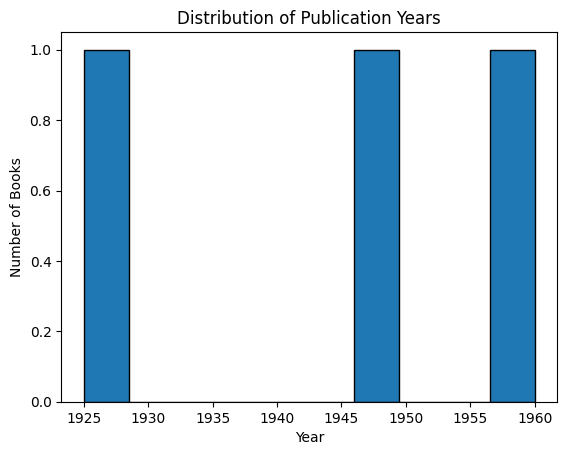

In [21]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.hist(df['year_published'], bins=10, edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

In [22]:
# Determine the decade of each book
df['decade'] = (df['year_published'] // 10) * 10
oldest_book = df[df['year_published'] == df['year_published'].min()]
print(f"The oldest book in the collection is '{oldest_book.iloc[0]['title']}' published in {oldest_book.iloc[0]['year_published']}.")
# Count the books in each decade
decade_counts = df['decade'].value_counts()

# Most popular decade for publications
popular_decade = decade_counts.idxmax()
print(f"The decade with the most publications is the {popular_decade}s.")

The oldest book in the collection is 'The Great Gatsby' published in 1925.
The decade with the most publications is the 1960s.


In [23]:
oldest_book = df[df['year_published'] == df['year_published'].min()]
print(f"The oldest book in the collection is '{oldest_book.iloc[0]['title']}' published in {oldest_book.iloc[0]['year_published']}.")

The oldest book in the collection is 'The Great Gatsby' published in 1925.
